In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools

%matplotlib inline

<h3>How Much is Your Car Worth?</h3>
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.
The columns are:
Price: suggested retail price of the used 2005 GM car in excellent condition.
Mileage: number of miles the car has been driven
Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
Type: body type such as sedan, coupe, etc.
Cylinder: number of cylinders in the engine
Liter: a more specific measure of engine size
Doors: number of doors
Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
Leather: indicator variable representing whether the car has leather seats (1 = leather)

<h3>Tasks, Part 1¶</h3>
<p>Find the linear regression equation for mileage vs price.</p>
<p>Chart the original data and the equation on the chart.</p>
<p>Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)</p>
<h3>Tasks, Part 2</h3>
<p>Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.</p>
<p>Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)</p>
<p>Find the combination of the factors that is the best predictor for price.</p>
<h3>Tasks, Part 3</h3>
<p>Research dummy variables in scikit-learn to see how to use the make, model, and body type.</p>
<p>Find the best combination of factors to predict price.</p>

In [158]:
df = pd.read_csv("car_data.csv")
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


<h3>Mileage and Price</h3>

In [159]:
car_lr = LinearRegression()
X = df[['Mileage']]
y = df['Price']

In [160]:
car_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h4>Linear Regression Plot of Mileage and Price</h4>

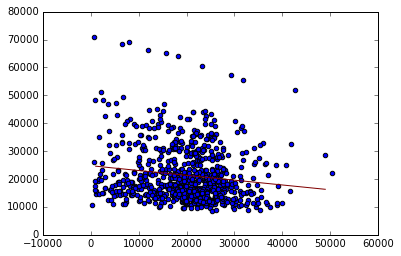

In [161]:
plt.scatter(X, y)

mileages = [mileage * 1000 for mileage in range(1, 50)]
predicted_prices = [car_lr.predict(mileage) for mileage in mileages]
plt.plot(mileages, predicted_prices, color='maroon')

In [162]:
print('Coefficient',car_lr.coef_)
print('Intercept', car_lr.intercept_)
print('R-squared', car_lr.score(X,y))

Coefficient [-0.1725205]
Intercept 24764.5590061
R-squared 0.0204634473235


Because of an R-squared value of 0.02, we determine that a equation is not a great fit for our data (R2 < 0.8)

<h3>Equation</h3>

y = -0.17x + 24764.6

<h2>Part 2: Multiple Linear Regression</h2>

In [163]:
car_mlr = LinearRegression()

In [164]:
columns = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
X = df[columns]
y = df['Price']#do 6 then 7

In [165]:
car_mlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
print('Intercept', car_mlr.intercept_)
print('')
print('R-squared', car_mlr.score(X,y))

Intercept 6758.7551436

R-squared 0.446264353673


<h2>Coefficients</h2>

In [167]:
list(zip(columns, car_mlr.coef_))

[('Mileage', -0.16974783233303678),
 ('Cylinder', 3792.3789307825205),
 ('Liter', -787.22073163383016),
 ('Doors', -1542.7458463820631),
 ('Cruise', 6288.9971498499326),
 ('Sound', -1993.7952756984257),
 ('Leather', 3349.3616196135517)]

<h3>Equations</h3>
<p>Mileage:  y = -0.17x + 6758.8</p>
<p>Cylinder:  y = 3792.4x + 6758.8</p>
<p>Liter:  y = -787.2x + 6758.8</p>
<p>Doors:  y = -1542.7x + 6758.8</p>
<p>Cruise:  y = 6289x + 6758.8</p>
<p>Sound:  y = -1993.8x + 6758.8</p>
<p>Leather:  y = 3349.4x + 6758.8</p>

<h3>Prediction</h3>
<p>Given a car with 40,000 miles, 6 cylinders, a 3.1 liter engine,</p>
<p>2 doors, cruise control, a sound system and leather interior:</p>
<p>We predict a price of 24.8k from our model</p>

In [168]:
car_mlr.predict([[40000, 6, 3.1, 2, 1,1,1]])

array([ 24841.80296791])

<h3>Holding everything else equal but changing mileage</h3>

ValueError: x and y must have same first dimension

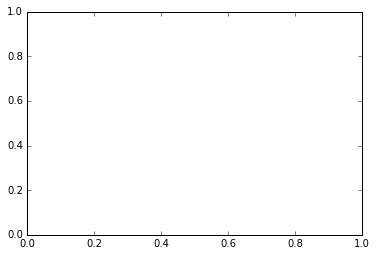

In [210]:
predicted_prices = []

for i in range(1, 7):
    Mileage = i * 10000
    Cylinder = 4
    Liter =3.1
    Doors = 4
    Cruise = 1
    Sound = 1
    Leather = 0
    price = car_mlr.predict([[mileage, cylinder, Liter, Doors, Cruise, Sound, Leather]])
    predicted_prices.append(price)

plt.plot( in range(1-7), predicted_prices, color='maroon')
print(predicted_prices)

In [179]:
car_lr3 = LinearRegression()
X = df[['Mileage','Cylinder']]
y = df['Price']

In [180]:
car_lr3.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price = df['Price']

combinations = [list(itertools.combinations(feature_columns, x)) for x in range(1,7)]
massaged_combos = []
for lst in combinations:
    for iterable in lst:
        massaged_combos.append(list(iterable))

scores = []
for lst in massaged_combos:
    regr_cars = linear_model.LinearRegression()
    regr_cars.fit(df[lst], price)
    scores.append((regr_cars.score(df[lst], price), lst))

sorted(scores, reverse=True)
print('Highest',sorted(scores)[0:20])
print('')
print('Lowest',sorted(scores)[-2])

Highest [(0.015462387624189167, ['Sound']), (0.019251466591467259, ['Doors']), (0.020463447323489481, ['Mileage']), (0.024710851264124534, ['Leather']), (0.036881215967350056, ['Mileage', 'Sound']), (0.037016287709034201, ['Doors', 'Sound']), (0.040399148671187213, ['Mileage', 'Doors']), (0.041418173468660391, ['Doors', 'Leather']), (0.045219563408868568, ['Mileage', 'Leather']), (0.047953690920827241, ['Sound', 'Leather']), (0.059250543920426613, ['Mileage', 'Doors', 'Sound']), (0.062563921219876972, ['Mileage', 'Doors', 'Leather']), (0.066873133161888476, ['Doors', 'Sound', 'Leather']), (0.069659406224365061, ['Mileage', 'Sound', 'Leather']), (0.089337093793707245, ['Mileage', 'Doors', 'Sound', 'Leather']), (0.1856330092969275, ['Cruise']), (0.19288948066869627, ['Cruise', 'Sound']), (0.1996382468921617, ['Doors', 'Cruise']), (0.20835368888535311, ['Doors', 'Cruise', 'Sound']), (0.2093138558315859, ['Mileage', 'Cruise'])]

Lowest (0.43780574153663798, ['Mileage', 'Cylinder', 'Liter',

The combinations that best predict price as measured by R2 value are:
1. Sound:  R-squared = 0.015
2. Doors:  R-Squared = 0.019
3. Mileage
4. Leather
5. Mileage, Sound
6. Doors,Sound

The lowest are:

Last: Mileage, Cylinder, Doors, Cruise, Sound, Leather | R2 = 0.445

Penultimate: Mileage, Cylinder, Liter, Doors, Cruise, Leather | R2 = 0.438


<h2>Part 3</h2>

In [211]:
dummy_make = pd.get_dummies(df[['Make']])
dummy_model = pd.get_dummies(df[['Model']])
dummy_type = pd.get_dummies(df[['Type']])